In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [70]:
data = pd.read_csv(r"D:\Excel Analyst\Machine Learning\Data set\Titanic-Dataset.csv")

In [71]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
Percentage = (data.isnull().sum()/data.shape[0])*100

# Percentage of empty data column wise

In [5]:
Percentage # Percentage of empty data column wise

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Checking sum of null values in each column

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Total Null Data 

In [7]:
data.isnull().sum().sum()   # Total Empty Data 

866

In [8]:
data.shape[0]

891

# Empty Percentage of Age column

In [9]:
(data['Age'].isnull().sum()/data.shape[0])*100  # Empty Percentage of Age column Less than 50 % so we will fill this column

19.865319865319865

# Empty Percentage of Cabin column

In [10]:
(data['Cabin'].isnull().sum()/data.shape[0])*100  # Empty Percentage of Cabin column is greater than 50 % so drop this column

77.10437710437711

# Overview of data like mean, median, std, max, min, Quartile, count etc

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Mean of Age

In [12]:
data['Age'].mean() # Get Mean 

29.69911764705882

# Filling mean value place of null in age column

In [13]:
data['Age'].fillna(data['Age'].mean(),inplace=True) # fill mean value 

In [14]:
data['Age'].isnull().sum()

0

# Drop Column

In [15]:
data.drop(['Cabin'],axis=1,inplace=True)   # Drop column Cabin

In [16]:
data.isnull().sum().sum()   # 

2

# Drop empty row 


In [17]:
data.dropna(inplace=True)   # Drop empty row only

In [18]:
data.isnull().sum().sum()  # There are no null values now data is clean

0

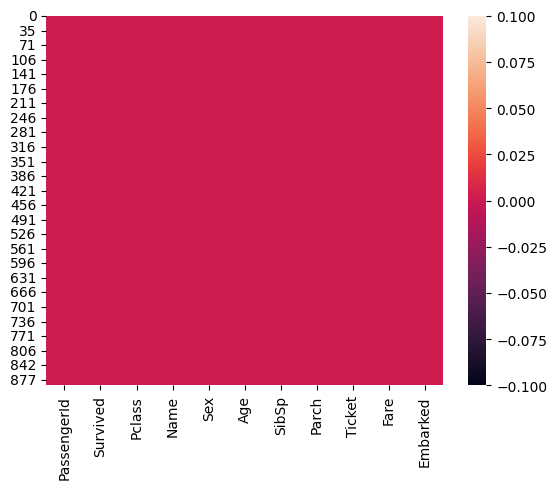

In [19]:
sns.heatmap(data.isnull())  # There are no null values
plt.show()

# Number of Survival, Gender wise

In [20]:
data['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

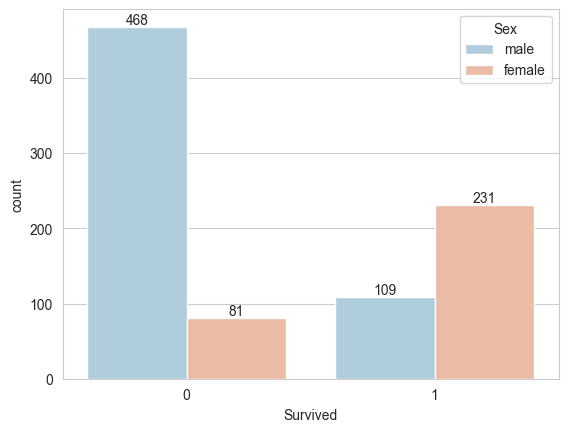

In [21]:
sns.set_style('whitegrid')
ds = sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')
for bars in ds.containers:
    ds.bar_label(bars)

# Number of male and female

In [22]:
num_females = data[data['Sex'] == 'female'].shape[0]
print(f"The number of females in the Titanic : {num_females}")

The number of females in the Titanic : 312


In [23]:
num_males = data[data['Sex'] == 'male'].shape[0]

print(f"The number of males in the Titanic : {num_males}")

The number of males in the Titanic : 577


In [24]:
data['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

C:\Users\computer\AppData\Local\Temp\ipykernel_21000\2132104831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ds = sns.countplot(x='Sex',data=data,palette='RdBu_r')


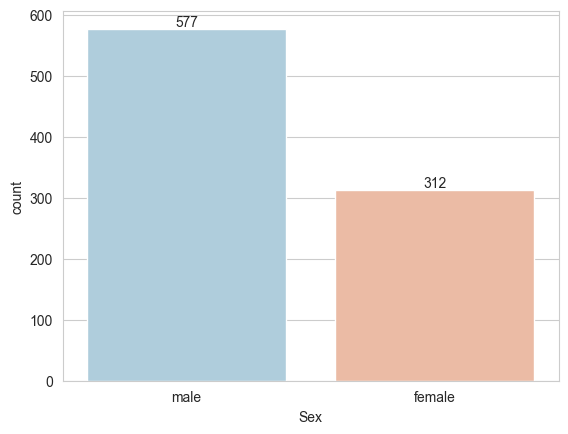

In [25]:
sns.set_style('whitegrid')
ds = sns.countplot(x='Sex',data=data,palette='RdBu_r')
for bars in ds.containers:
    ds.bar_label(bars)

# Correlation between the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) and survival 

In [26]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

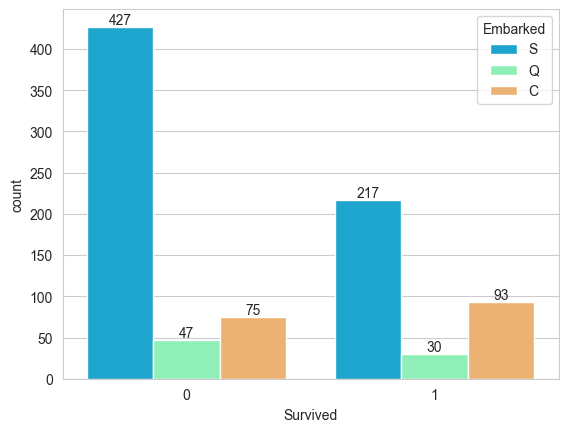

In [27]:
sns.set_style('whitegrid')
ds = sns.countplot(x='Survived',hue='Embarked',data=data,palette='rainbow')
for bars in ds.containers:
    ds.bar_label(bars)

# Number of Passenger Class with Embarked

In [28]:
data['Pclass'].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

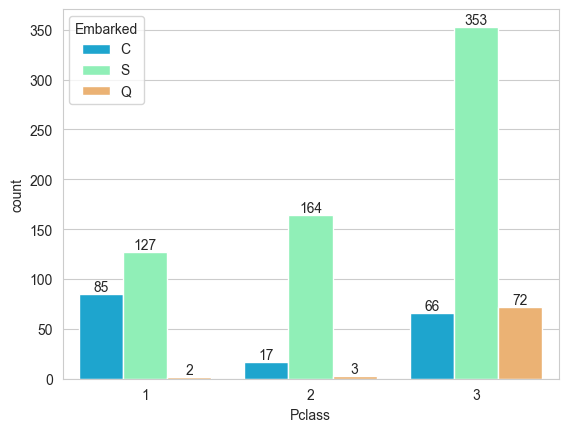

In [29]:
sns.set_style('whitegrid')
ds = sns.countplot(x='Pclass',hue='Embarked',data=data,palette='rainbow')
for bars in ds.containers:
    ds.bar_label(bars)

# Number of Survived from each Passenger Class 

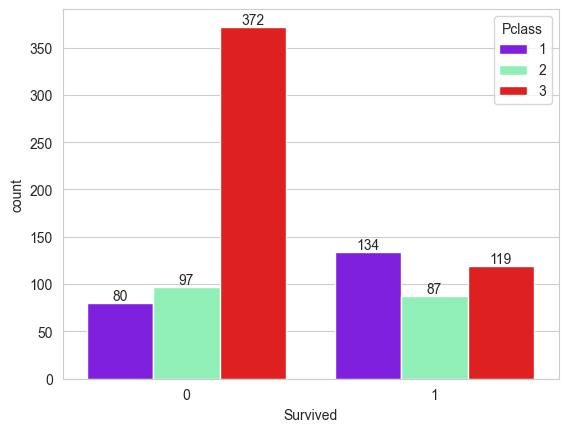

In [30]:
sns.set_style('whitegrid')
ds = sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')
for bars in ds.containers:
    ds.bar_label(bars)

# Number of Sibling Spouse on Gender

In [31]:
data['SibSp'].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

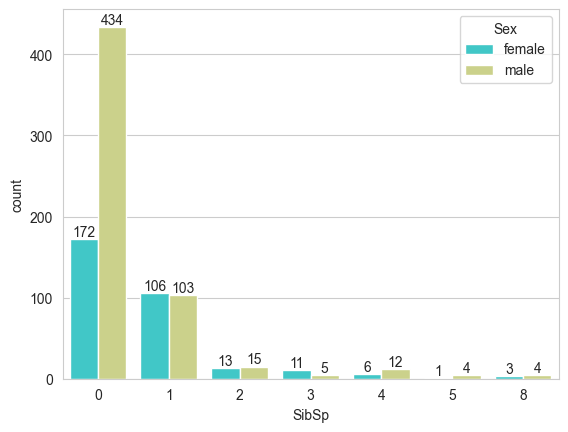

In [32]:
sns.set_style('whitegrid')
ds = sns.countplot(x = 'SibSp',hue='Sex',data=data,palette='rainbow')
for bars in ds.containers:
    ds.bar_label(bars)

# Member Survived from each Sibling spouse

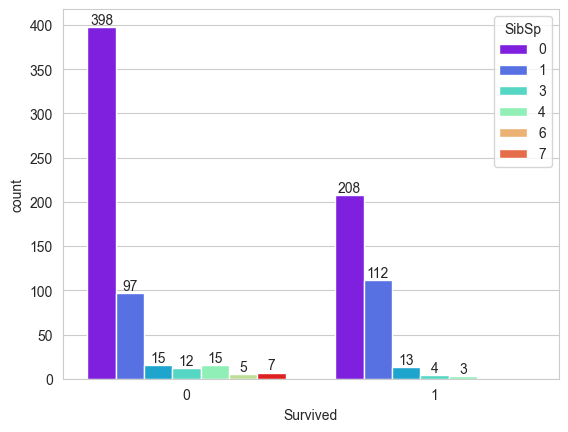

In [64]:
sns.set_style('whitegrid')
ds = sns.countplot(x = 'Survived',hue='SibSp',data=data,palette='rainbow')
for bars in ds.containers:
    ds.bar_label(bars)

# Max values row wise

In [33]:
max_row = data.loc[data['Age'].idxmax()]
max_row

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Embarked                                          S
Name: 630, dtype: object

# Find the maximum age and corresponding name

In [34]:
max_row = data.loc[data['Age'].idxmax()]
max_age = max_row['Age']
max_old_name = max_row['Name']
print(max_age,max_old_name)

80.0 Barkworth, Mr. Algernon Henry Wilson


In [35]:
data['Age'].max()

80.0

# Find minmum age and their name 

In [36]:
min_row = data.loc[data['Age'].idxmin()]
min_age = min_row['Age']
min_age_name = min_row['Name']
print(min_age,min_age_name)

0.42 Thomas, Master. Assad Alexander


In [37]:
data['Age'].min()

0.42

# Find the minimum fare and corresponding name 

In [38]:
min_fare_row = data.loc[data['Fare'].idxmin()]

min_fare = min_fare_row['Fare']
name_of_min_age = min_fare_row['Name']
print(f"The minimum fare is {min_fare} and the corresponding name is {name_of_min_age}.")

The minimum fare is 0.0 and the corresponding name is Leonard, Mr. Lionel.


# Find the maximum fare and corresponding name

In [39]:
max_fare_row = data.loc[data['Fare'].idxmax()]

max_fare = max_fare_row['Fare']
name_of_max_age = max_fare_row['Name']

print(f"The maximum fare is {max_fare} and the corresponding name is {name_of_max_age}.")


The maximum fare is 512.3292 and the corresponding name is Ward, Miss. Anna.


# Get whole information of data

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 115.6+ KB


# Get data only object data types

In [41]:
data.select_dtypes(include="object")   # Object Data types

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


# Get data only integer data type

In [42]:
data.select_dtypes(include="int")  # Integer Data Types

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


# Get data only float data type

In [43]:
data.select_dtypes(include="float")   # Float Data Types

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


# Drop column

In [44]:
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [45]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


# Convert data type into integer

In [46]:
data['Age']= data['Age'].astype('int')
data['Fare'] = data['Fare'].astype('int')

In [47]:
data.dtypes

Survived     int64
Pclass       int64
Sex         object
Age          int32
SibSp        int64
Parch        int64
Fare         int32
Embarked    object
dtype: object

In [48]:
en_cod_sex = data["Sex"]
en_cod_Emb = data["Embarked"]

# Encoding data into bool

In [ ]:
# data.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [49]:
sex = pd.get_dummies(en_cod_sex).head()

In [50]:
sex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [51]:
embarked = pd.get_dummies((en_cod_Emb))

# Drop first dummy column

In [52]:
embarked = pd.get_dummies((en_cod_Emb),drop_first=True)

In [53]:
embarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [54]:
sex = pd.get_dummies((en_cod_sex),drop_first=True)

In [55]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [56]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7,S
1,1,1,female,38,1,0,71,C
2,1,3,female,26,0,0,7,S
3,1,1,female,35,1,0,53,S
4,0,3,male,35,0,0,8,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13,S
887,1,1,female,19,0,0,30,S
888,0,3,female,29,1,2,23,S
889,1,1,male,26,0,0,30,C


# Drop those column which use to create dummies column

In [57]:
data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [58]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22,1,0,7
1,1,1,38,1,0,71
2,1,3,26,0,0,7
3,1,1,35,1,0,53
4,0,3,35,0,0,8
...,...,...,...,...,...,...
886,0,2,27,0,0,13
887,1,1,19,0,0,30
888,0,3,29,1,2,23
889,1,1,26,0,0,30


# Concatenate dummies column into oringinal data set

In [59]:
data = pd.concat([data,sex,embarked],axis=1)

# Convert whole data into integer data type

In [60]:
data = data.astype(int)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  889 non-null    int32
 1   Pclass    889 non-null    int32
 2   Age       889 non-null    int32
 3   SibSp     889 non-null    int32
 4   Parch     889 non-null    int32
 5   Fare      889 non-null    int32
 6   male      889 non-null    int32
 7   Q         889 non-null    int32
 8   S         889 non-null    int32
dtypes: int32(9)
memory usage: 70.5 KB


In [62]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22,1,0,7,1,0,1
1,1,1,38,1,0,71,0,0,0
2,1,3,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,1
4,0,3,35,0,0,8,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,1,0,1
887,1,1,19,0,0,30,0,0,1
888,0,3,29,1,2,23,0,0,1
889,1,1,26,0,0,30,1,0,0


In [65]:
X = data.drop(['Survived'],axis=1)
Y = data['Survived']

In [66]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22,1,0,7,1,0,1
1,1,38,1,0,71,0,0,0
2,3,26,0,0,7,0,0,1
3,1,35,1,0,53,0,0,1
4,3,35,0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27,0,0,13,1,0,1
887,1,19,0,0,30,0,0,1
888,3,29,1,2,23,0,0,1
889,1,26,0,0,30,1,0,0


In [72]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int32

# Spliting the data into Training data and Test data

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [78]:
X.shape,X_train.shape,X_test.shape

((889, 8), (711, 8), (178, 8))

# Model Training, Logistic regression

In [82]:
model = LogisticRegression()

In [84]:
model.fit(X_train, Y_train)

C:\Users\computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation 
# Accuracy Score

In [86]:
X_train_pridiction = model.predict(X_train)

In [88]:
X_train_pridiction

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Comparing training data
# Accuracy on train data

In [97]:
training_data_accuracy = accuracy_score(Y_train,X_train_pridiction)
print('Accuracy Score of training data: ',training_data_accuracy)

Accuracy Score of training data:  0.8045007032348804


In [91]:
X_test_pridiction = model.predict(X_test)
X_test_pridiction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0])

# Accuracy on test data

In [96]:
X_test_accuracy = accuracy_score(Y_test, X_test_pridiction)
print('Accuracy Score of test data: ',X_test_accuracy)

Accuracy Score of test data:  0.797752808988764
